1.What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

-> K-Means Clustering- Partition-based clustering
   How it works: You specify the number of clusters(K) beforehand. The algorithm assigns each data point to the nearest cluster centriod and updates centroids iteratively until convergence.
   Shape bias: Works best with sperical, equally sized clusters.
   Scalability: Very efficient on large datasets.
   Limitation: Sensitive to initial centroids and requires knowing k in advance.
   Use case: Customer segmentation in Marketing
   E.g., an e-commerce company wants to group customers into 4-5 segments based on purchase behavior. K-means works well here because the number of desired clusters is known, and the dataset is large.

   -> Hierarchical Clustering- Tree-based clustering
   How it works: Agglomerative-starts with each data point as its own cluster, then successively merge the two closest clusters.
   Divisive-start with one big cluster and recursively split.
   Results are represented as a dendrogram, which can be cut at different levels to choose clusters.
   Shape biase: No need to predefined number of clusters. can handle complex cluster shapes better.
   Scalability: Computationally expensive on very large datasets.
   Limitation: Less efficient compared to K-means when n is n huge.
   Use case: Document clustering in Research papers
   e.g., suppose a researcher wants to see how 200 papers naturally group together based on similarity. Hierarchial clustering is useful because the number of clusters is unknown and a dendrogram helps visualize the relationships.


2.Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

-> *Evaluate clustering quality- Higher average silhouette score= better defined clusters.

*Compare different algorithms- Helps choose between K-means, hierarchical, DBSCAN, etc.

*Determine optimal number of clusters(k)- Run K-means with different k, compute silhoutte scores, and select the one with the highest scpre.

3. What are the core parameters of DBSCAN, and how do they influence the clustering process?

-> eps(E-Epsilson):The maximun radius of the neighborhood around a point.
     Influence: A point another point if its lies within this distance.
     *small eps- many points may be considered noise (outliers) more smaller clusters.
     *Large eps- Fewer clusters, risk of merging distinct clusters.

  minPts(minimum Points): Minimum number of points required to form a dense region(clusters).
     Influence:*Low minPts- More clusters, may include noise as clusters.
     *High minPts-sticter definition of clusters, more points marked as noise.
     *Rule of thumb- often set as minPts >- D+1 where D=number of dimensions of the dataset.

4.why is feature scaling important when applying clustering algorithm like K-means and DBSCAN?

-> Clustering algorithms (like K-means and DBSCAN) rely on distance measures (most often Euclidean distance) to group points.
        In Euclidean space, features with larger numeric ranges dominate distance calculations.
         This can bias clustering toward features with bigger scales, even if they are less important.

5.What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

-> Determine the best k(number of clusters).
Idea: As l increases, the within-cluster variance(inertia/SSE- sum of squared errors) decreses because clusters get smaller and more specialized.
But beyond a certain point, the improvement levels off-adding more clusters doesn't significantly reduce the error.
The point where this sharp drop transitions to a plateau looks like an "elbow" on the graph.

Advantages-
*Prevents under-Clustering
*Prevents over-clustering
*Provides a visual, data-driven way to chose k.

6.Generate synthetic data. apply Kmeans clustering and visualize the results with clusters centers.

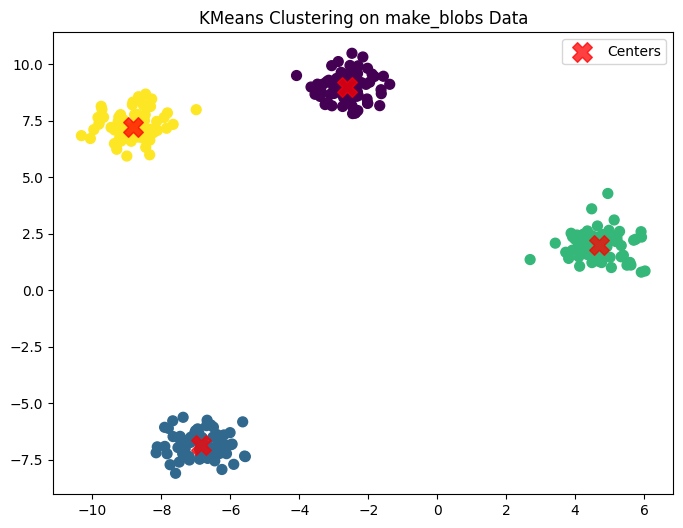

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6,
random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title("KMeans Clustering on make_blobs Data")
plt.legend()
plt.show()

7.Load the Wine dataset, apply StandardScaler and train a DBSCAN model. Print number of clusters found.

In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters labels:", np.unique(labels))
print("Number of clusters found (excluding noise):", n_clusters)

Clusters labels: [-1]
Number of clusters found (excluding noise): 0


8.Generate moon-shaped sunthetic data using make_moons apply DBSCAN and highlight the outliers in the plot.

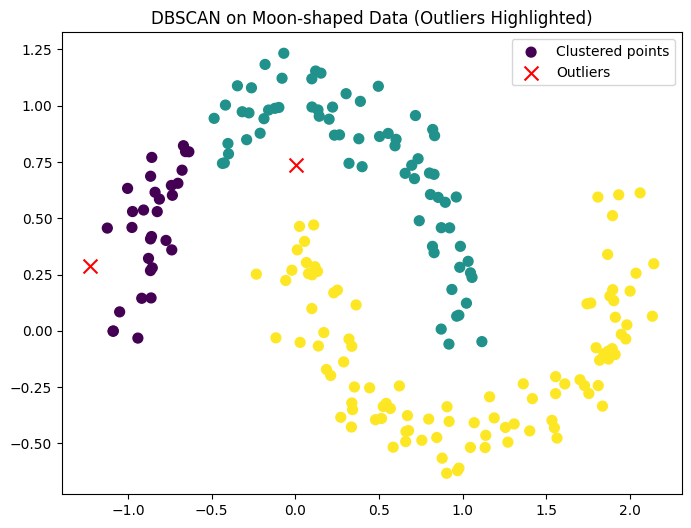

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[labels >= 0, 0], X[labels >= 0, 1],
            c=labels[labels >= 0],
            cmap="viridis", s=50, label="Clustered points")
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c='red', marker="x", s=100, label="Outliers")
plt.title("DBSCAN on Moon-shaped Data (Outliers Highlighted)")
plt.legend()
plt.show()

9.Load a wine data set, reduce it to 2D using PCA then apply Agglomerative clustering and visualize the result in 2D with scatter plot.

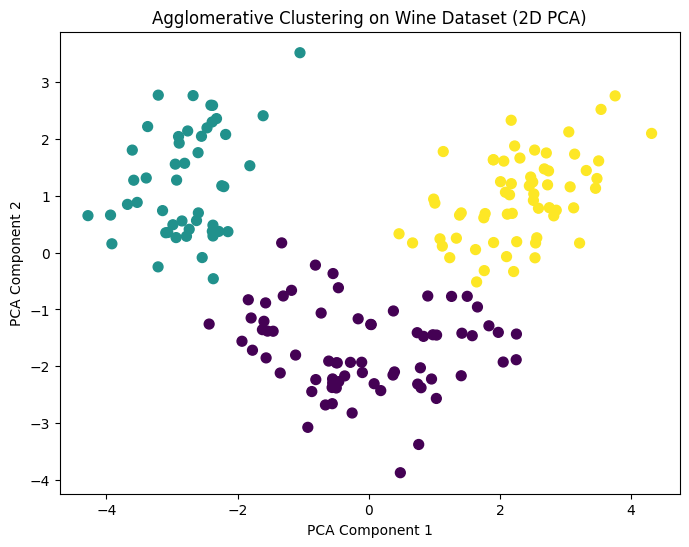

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
wine = load_wine()
X = wine.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
agg_clust = AgglomerativeClustering(n_clusters=3)
labels = agg_clust.fit_predict(X_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

10. You are working as a Data Analyst at e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to targeted promotions. The dataset contains customer demographic and their produce purchase history across cateegories.

a) which clustering algorithms would you use and why?

--> K-Means clustering- Good for large scale customer segmentation since it is fast, scalable and works well when we assume spehrical clusters. Alternative is DBSCAN or Hierarchical Clustering could be explored if we expect irregular shaped clusters or noise, but K-Means is usaully the starting point in marketing segmentation.

b)How would you preprocess the data(missing value, sacling)?

--> *Handle Missing value-Fill missing demographics with median/mean or impute with KNN.
*Scaling- Apply StandardScaler or MinMaxScaler so that feature like "Annual Income" and "Age" contribute equally.
*Encoding Categorical variable- convert categorical feature.

c)How would you determine the number of clusters?

-->*Elbow mathod-Plot within cluster sum of squares (SSE) vs number of clusters and find the elbow point.
*Silhoutte score- evaluate cluster quality for different k values and pick the one with the highest average silhoutte score.

d)How would the marketing team benefit from your clustering analysis?

--> *Targeted promotions- Different clusters can represent "High spenders", "Discount seekers", "Occasional buyers", etc. Each group can be targeted with specific promotions.
*Persoanalization- Recommend products based on cluster behavior.
*Customer Retention- Identify at risk customers who buy less frequently and design retention campaigns.
*Resource optimization- Helps allocate marketing budget effectively by focusing on profitable customer segments.

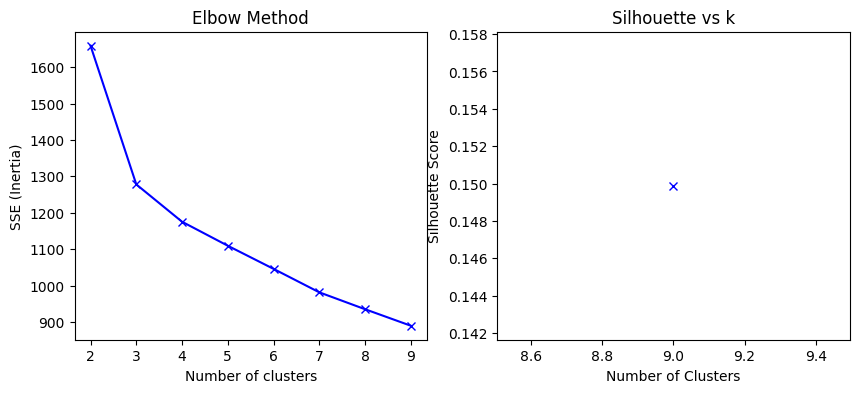

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        13.151633    3.344490  2.434694          21.438776   99.020408   
1        13.790545    1.931091  2.433636          16.783636  105.945455   
2        12.295111    1.709333  2.164222          19.726667   89.222222   
3        12.342069    2.374483  2.437931          20.993103  105.517241   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             1.678163    0.797959              0.450816         1.163061   
1             2.856182    3.010000              0.285091         1.903273   
2             2.030000    1.809556              0.396000         1.354667   
3             2.684828    2.590690              0.304138         2.087931   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  \
Clust

In [13]:
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
X = df.drop(columns=["target"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sse, silhouette_scores = [], []
K = range(2, 10)
for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  labels = kmeans.fit_predict(X_scaled)
  sse.append(kmeans.inertia_)
silhouette_scores.append(silhouette_score(X_scaled, labels))
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel("Number of clusters");
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method")
plt.subplot(1, 2, 2)
plt.plot(k, silhouette_scores, 'bx-')
plt.xlabel("Number of Clusters");
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs k")
plt.show()
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
print(df.groupby("Cluster").mean())